Наивный Байес

P(A|B) = P(B|A)*P(A)
____________P(B)

P(A|B) - как часто происходит событие A при наступлении события B или «апостериорная вероятность»
P(B|A) - как часто происходит событие B при наступлении события A
P(A) - какова вероятность того, что A не зависит от других событий
P(B) - какова вероятность того, что B не зависит от других событий

In [168]:
import pandas as pd
stolen = pd.read_csv('Угон Автомобиля.csv', sep = ';') # Загрузка csv файла с гитхаба сразделителем;
stolen

,Цвет,Тип,Производство,Угон
0,Красный,Спортивная,Отечественная,Да
1,Красный,Спортивная,Отечественная,Нет
2,Красный,Спортивная,Отечественная,Да
3,Желтый,Спортивная,Отечественная,Нет
4,Желтый,Спортивная,Импортная,Да
5,Желтый,Внедорожник,Импортная,Нет
6,Желтый,Внедорожник,Импортная,Да
7,Желтый,Внедорожник,Отечественная,Нет
8,Красный,Внедорожник,Импортная,Нет
9,Красный,Спортивная,Импортная,Да


In [192]:
def P_stolen(array, list_find):
    """Для Создания фреймов ДА и НЕТ и передачей их в функцию для подсчета апостериорной вероятности для каждого исхода ДА и НЕТ + вывод результата расчета апостериорной вероятности"""
    cols = array.columns  # Получение названия столбцов из таблицы
    unique = pd.unique(array[cols[-1]]) # Получение уникальных значений столбца Угон
    array_yes = array[array[cols[-1]] == unique[0]] # Срез фрейма по значению столбца Угон == ДА
    array_no = array[array[cols[-1]] == unique[1]] # Срез фрейма по значению столбца Угон == НЕТ
    yes = P_Yes(array,array_yes, list_find)
    no = P_Yes(array, array_no, list_find)
    print(f" {yes} %s {no} => %s" %(">" if yes>no else "<","Угонят" if yes>no else "Не угонят")) # Принт с двумя вставками %с после %(тут через запятую два параметра которых нужно вставить)

def P_Yes(array,array_yes,list_find):
    """Подсчет высчитывается апостериорной вероятности для классов ДА и НЕТ в зависимости от переданного массива array_yes"""
    P_yes = 1 # Чисто для того чтобы сделать перемножение этой переменной с вероятностью в цикле
    array_yes = array_yes.drop(array_yes.columns[len(array_yes.columns)-1], axis=1)
    cols = array_yes.columns
    for i in range(len(cols)):
        P_yes = P_yes * (len(array_yes[array_yes[cols[i]] == list_find[i]])/len(array_yes))
        P_yes= P_yes * (len(array_yes)/len(array))
    return(P_yes)
Color = "Красный"
Type = "Внедорожник"
Origin = "Отечественная"
list_find = [Color, Type, Origin]
P_stolen(stolen, list_find)

 0.006 < 0.018 => Не угонят


Тут проверял на таблице с обучения по ИИ моя функция показывают такие же результаты как из обучения

In [196]:
train_df = pd.read_csv("trainset1.csv",  sep = ';')
train_df = train_df.drop('Day', axis=1)
#print(train_df)
def P_train(array, list_find):
    """Для Создания фреймов ДА и НЕТ и передачей их в функцию для подсчета апостериорной вероятности для каждого исхода ДА и
    НЕТ + вывод результата расчета апостериорной вероятности"""
    cols = array.columns  # Получение названия столбцов из таблицы
    unique = pd.unique(array[cols[-1]]) # Получение уникальных значений столбца Угон
    array_yes = array[array[cols[-1]] == unique[0]] # Срез фрейма по значению столбца Угон == ДА
    array_no = array[array[cols[-1]] == unique[1]] # Срез фрейма по значению столбца Угон == НЕТ
    yes = P_Y(array_yes,list_find, array)
    no = P_Y(array_no,list_find, array)
    print(f" {yes} %s {no} => %s" %(">" if yes>no else "<","Угонят" if yes>no else "Не угонят")) # Принт с двумя вставками %с после %(тут через запятую два параметра которых нужно вставить)
def P_Y(array_yes,list_find, array):
    """Подсчет высчитывается апостериорной вероятности для классов ДА и НЕТ в зависимости от переданного массива array_yes"""
    P_yes = 1 # Чисто для того чтобы сделать перемножение этой переменной с вероятностью в цикле
    array_yes = array_yes.drop(array_yes.columns[len(array_yes.columns)-1], axis=1)
    cols = array_yes.columns
    for i in range(len(cols)):
        P_yes = P_yes * (len(array_yes[array_yes[cols[i]] == list_find[i]])/len(array_yes))
    P_yes= P_yes * (len(array_yes)/len(array))
    return(P_yes)
Color = 'Sunny'
Type = 'Mild'
Origin = 'Normal'
four = 'Weak'
list_find = [Color, Type, Origin, four]
P_train(train_df, list_find)

 0.006857142857142858 < 0.028218694885361547 => Не угонят


Логистическая регрессия

In [197]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LogisticRegression

In [198]:
x = np.arange(10).reshape(-1, 1)    # массив от 0 до 1 и преобразование его в вектор столбец
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # массив вектор строка
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


In [328]:
model = LogisticRegression(solver='liblinear', C=100.0, random_state=0) # solver Алгоритм для использования в задаче оптимизации, C - крутизна построенной регрессии чем больше тем круче
model.fit(x, y) # Обучение модели на х и у
z=model.predict_proba(x)   # predict это возврат массива предсказанных классов, а predict_proba это возврат многомерного массива вероятностей по классам
z

array([[9.99767648e-01, 2.32352249e-04],
       [9.97314762e-01, 2.68523764e-03],
       [9.69750840e-01, 3.02491602e-02],
       [7.34552483e-01, 2.65447517e-01],
       [1.92805594e-01, 8.07194406e-01],
       [2.02011336e-02, 9.79798866e-01],
       [1.77649472e-03, 9.98223505e-01],
       [1.53591345e-04, 9.99846409e-01],
       [1.32594349e-05, 9.99986741e-01],
       [1.14453110e-06, 9.99998855e-01]])

уравнение k*x + b где k - [[2.44972645]],a b - [-8.36702365]


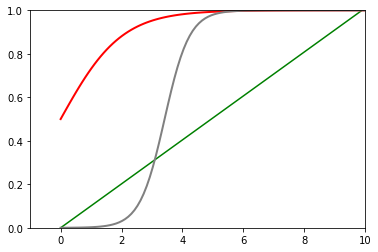

In [322]:
X_test = np.linspace(0, 10,100) # возвращает массив из 100 точек в интервале от 0 до 10
plt.plot(X_test, color = 'green') # график линии X_test
plt.xlim(-1,10) # шкала x
plt.ylim(0,1) # шкала у
X_logistic = expit(X_test)  # Возвращает логистическую сигмоидальную функцию из линии
plt.plot(X_test, X_logistic, color='red', linewidth=2)
X_logistic = expit(X_test * model.coef_ +model.intercept_).ravel() # .ravel эквивалентно записи .reshape(-1) нужно потому что expit(X_test * model.coef_ +model.intercept_) эта запись возвращает массив в массиве то есть двумерный а нам для plot нужен 1D массив
print(f"уравнение k*x + b где k - {model.coef_},a b - {model.intercept_}")
plt.plot(X_test, X_logistic, color='gray', linewidth=2)

уравнение k*x + b где k - [[2.44972645]],a b - [-8.36702365]


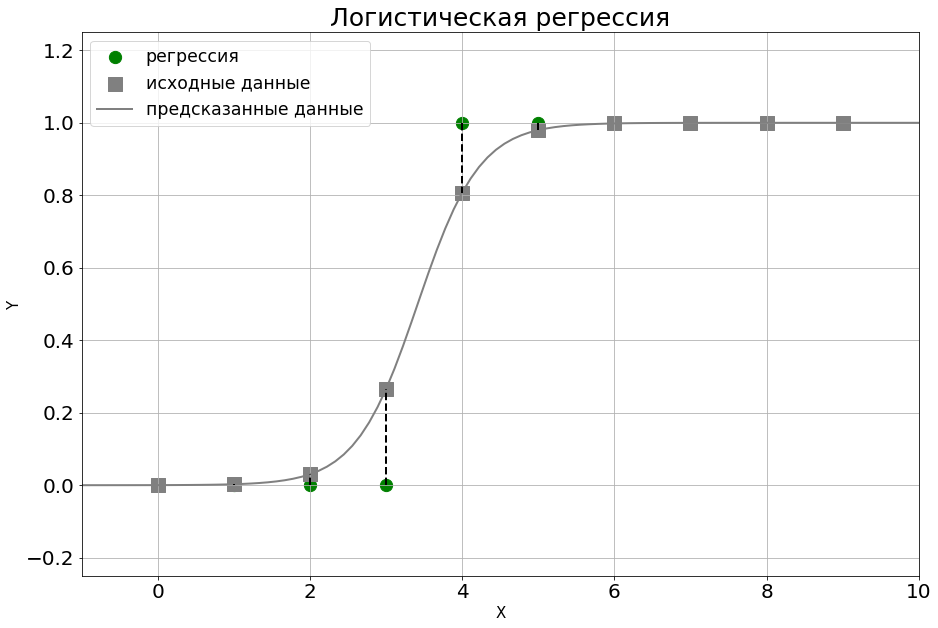

In [340]:
fig = plt.figure(figsize=(15,10)) # размер графика
axes = plt.axes() # оси
axes.set_xlim([-1, 10]) # мин макс оси х
axes.set_ylim([-0.25, 1.25]) # мин макс оси у
axes.grid() # сетка
axes.set_xlabel("X", fontsize = 15) # подпись оси х и размер шрифта 15
axes.set_ylabel("Y", fontsize = 15) # подпись оси у и размер шрифта 15
axes.tick_params( labelsize=20) # размер подписей шкалы
legend = []
plt.title('Логистическая регрессия', fontsize = 25) # заголовок рисунка и его размер
plt.scatter(x, y, color='green', s=150, marker="o") # точечный рисунок, цвет, размер точек, стиль точек
plt.scatter(x, z[:, 1], color='gray', s=175, marker="s")
X_test = np.linspace(-1, 10, 100)
print(f"уравнение k*x + b где k - {model.coef_},a b - {model.intercept_}")
loss = expit(X_test * model.coef_ + model.intercept_) .ravel()
plt.plot(X_test, loss, color='gray', linewidth=2)
plt.vlines(x, y, z[:, 1], color='black', linewidth=2, linestyles='dashed') # график вертикальных линий с параметрами х , у мин, у макс, цвет, толщина, стиль линии пунктир
legend.append("регрессия")
legend.append("исходные данные") # список дегенды
legend.append("предсказанные данные")
plt.legend(legend, fontsize='xx-large', loc="upper left") # добавление легенды с параметрами размера и расположения на графике

Задание: Создать примерно такую же логистическую функцию с помощью библиотеки Fyzzlogic

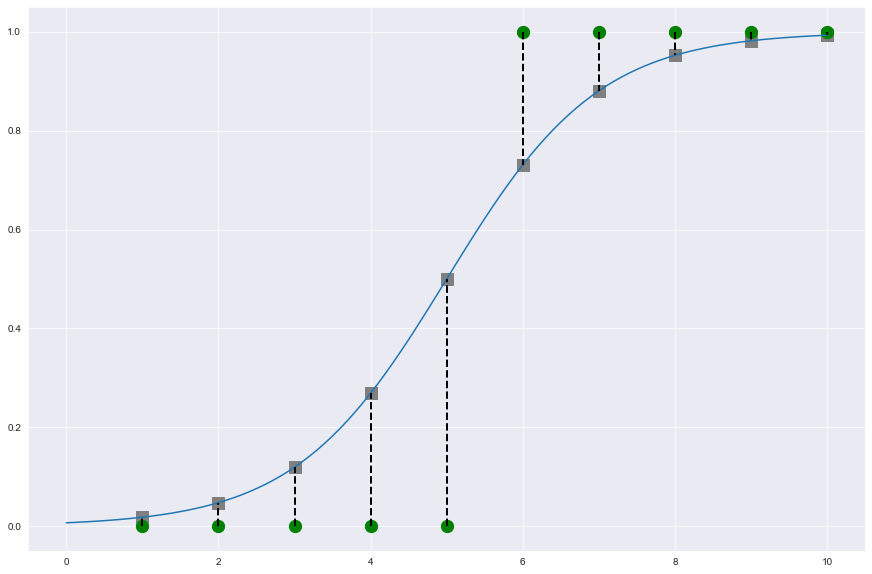

In [580]:
from fuzzylogic.classes import  Domain
import matplotlib.pyplot as plt
from fuzzylogic.functions import sigmoid
fig = plt.figure(figsize=(15,10)) # размер графика
T = Domain("test", 0, 10, res=0.1)
X_test = np.linspace(1,10,10)
T.sigmoid = sigmoid(1,1,5) # sigmoid(L, k, x0) f(x) = L / (1 + e^(-k*(x-x0))) L - Высота функции, k - крутизна, x0 центр сигмоида
T.sigmoid.plot(label = 'X')
for i in range(len(X_test)):
    plt.scatter(X_test[i],T.sigmoid(X_test[i]),color = 'grey',s=150,marker="s")
    plt.scatter(X_test[i], 1 if T.sigmoid(X_test[i])>0.5 else 0,color = 'green',s=150,marker="o")
    plt.vlines(X_test[i], 1 if T.sigmoid(X_test[i])>0.5 else 0 , T.sigmoid(X_test[i]), color='black', linewidth=2, linestyles='dashed')

LDA - Linear Discriminant Analysis

In [554]:
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
iris= load_iris() # загрузка датасета ирисов
X = pd.DataFrame(iris.data,columns=iris.feature_names) # Х параметры с названиями столбцов
y = pd.DataFrame(iris.target).to_numpy() # у это датафрейм классов ирисов
X['class'] = y # приссоединение столбца у к Х с названием столбца 'class', чисто для того что бы построить график в след блоке
X.head() # первые 5 строк датафрема

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


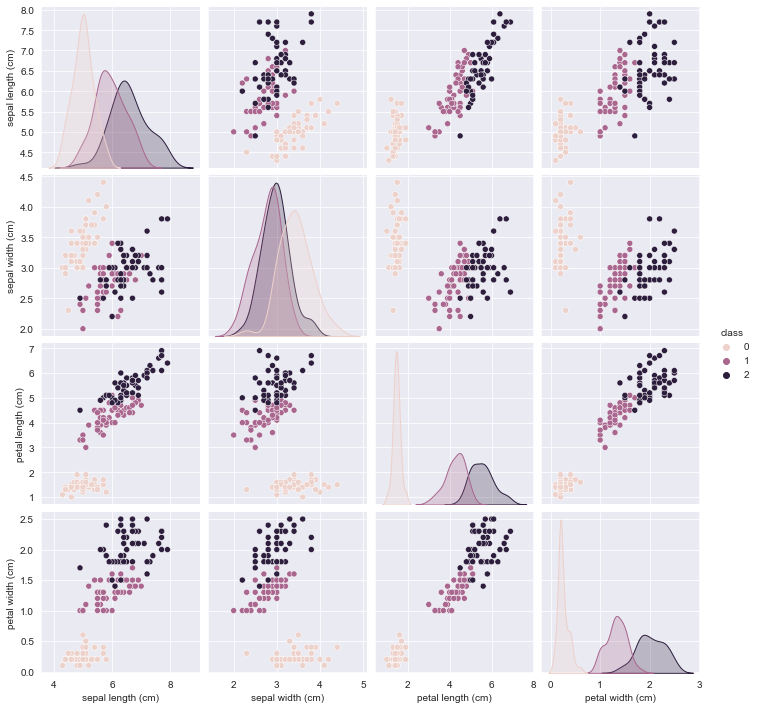

In [559]:
sns.pairplot(X, hue='class') # отрисовка гистограм распределения классов по разным параметрам

Точность : 0.9733333333333334
[[26  0  0]
 [ 0 24  2]
 [ 0  0 23]]


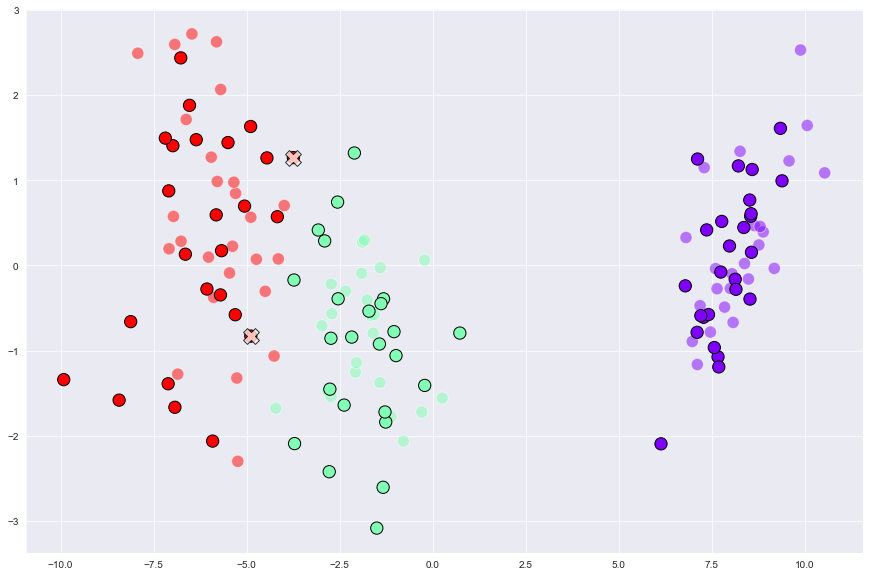

In [578]:
X['class'].drop # удаление стобца классов
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.5) # разбиение датафрейма в рандомном порядке на тестовую и тренировучную выборку 50/50
lda = LinearDiscriminantAnalysis() # создание модели линейного дискриминантного анализа
X_train = lda.fit_transform(X_train, y_train) # обучение модели на тренировочной выборке
y_pred = lda.predict(X_test) # предсказание классов на основании обученной модели
X_test = lda.transform(X_test) # преобразование тестовой выборки для отображения неправильно предсказанных точек
fig = plt.figure(figsize=(15,10)) # размер графика
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel(),cmap='rainbow', alpha=0.5,edgecolors='white', s=150) # точечный график тренировочной выборки где с - это массив для отображения определенным цветом разных классов, cmap - цветовая гамма точек, alpha - прозрачность точек, edgecolors - цвет каёмки точек, s - размер точек
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='rainbow', alpha=1,edgecolors='black', s=150) # построение точек тестовой выборки
print('Точность : ' + str(accuracy_score(y_test, y_pred))) # вывод % точности обученной модели
conf_m = confusion_matrix(y_test, y_pred) # вывод матрицы ошибок по всем 3 классам
for i in range(len(y_test)):    # цикл для определения какая из предсказанных точек оказалась ошибочной и отрисовка ее в виде крестика
    if y_test[i] != y_pred[i]:
        plt.scatter( X_test[i,0],X_test[i,1],c=y_test[i],cmap='Reds', alpha=0.8,edgecolors='black', s=250,marker = 'X')
print(conf_m)